In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split #for split the data
warnings.filterwarnings('ignore')

% matplotlib inline
#Titanic.info(memory_usage='deep')

In [2]:
train = pd.DataFrame(pd.read_excel('titanic3.xls', sheet_name='Train'))
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 14 columns):
pclass       915 non-null int64
survived     915 non-null int64
name         915 non-null object
sex          915 non-null object
age          721 non-null float64
sibsp        915 non-null int64
parch        915 non-null int64
ticket       915 non-null object
fare         915 non-null float64
cabin        222 non-null object
embarked     914 non-null object
boat         346 non-null object
body         86 non-null float64
home.dest    511 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 414.6 KB


In [3]:
test = pd.DataFrame(pd.read_excel('titanic3.xls', sheet_name='Test'))
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 14 columns):
pclass       394 non-null int64
survived     394 non-null int64
name         394 non-null object
sex          394 non-null object
age          325 non-null float64
sibsp        394 non-null int64
parch        394 non-null int64
ticket       394 non-null object
fare         393 non-null float64
cabin        73 non-null object
embarked     393 non-null object
boat         140 non-null object
body         35 non-null float64
home.dest    234 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 179.3 KB


In [4]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
body,829,90.601093
cabin,693,75.737705
boat,569,62.185792
home.dest,404,44.153005
age,194,21.202186
embarked,1,0.109290


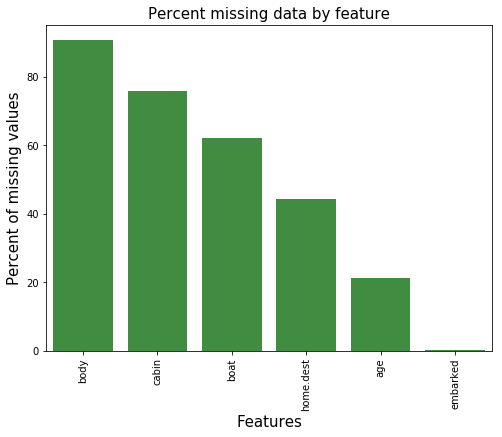

In [9]:
#Looking for some details about the test and train data
missingdata(train)

,Total,Percent
body,359,91.116751
cabin,321,81.472081
boat,254,64.467005
home.dest,160,40.609137
age,69,17.512690
embarked,1,0.253807
fare,1,0.253807


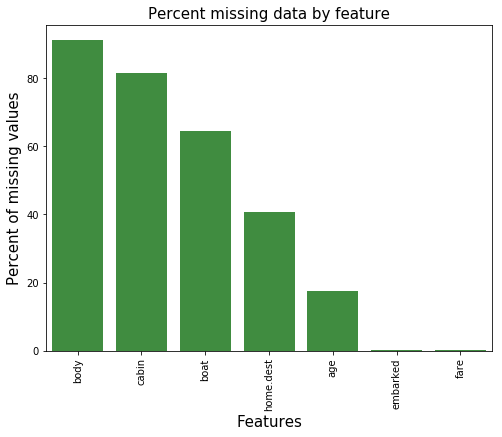

In [6]:
missingdata(test)

In [7]:
test['age'].mean(), test['age'].min(), test['age'].max()

(29.313076923076924, 0.75, 74.0)

In [8]:
train['age'].mean(), train['age'].min(), train['age'].max()

(30.13719375866852, 0.1667, 80.0)

In [ ]:
#Now we'd like to fill the NaN walues and exclude columns with huge amount of nullable rows
